In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#PLOT CONFUSION MATRIX
import itertools
import pickle


#default size of the graph
plt.rcParams['figure.figsize'] = (10.0, 8.0) 


%load_ext autoreload
%autoreload 2


import jj_basic_fn as JJ
from hyperparams import Hyperparams as hp
from patient import patient
import prep
from modules import *

/Users/hp/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
col_rs = hp.col_rs
col_es = hp.col_es
col_le = hp.col_le


p231, p222_1, p222_2, p222_3 = build_patients()

NameError: name 'p222' is not defined

In [3]:
raw_data_222 = pd.read_csv('../data/NY222_2015-08-11_to_2018-06-12_daily_20180613153105.csv', skiprows = 3)
raw_data_222.loc[:, 'id'] = '222'
raw_data_231 = pd.read_csv('../data/NY231_2016-07-05_to_2018-06-12_daily_20180613153815.csv', skiprows = 3)
raw_data_231.loc[:, 'id'] = '231'
frames = [raw_data_222, raw_data_231]
raw_data = pd.concat(frames)


In [4]:
pat_list = [p231, p222_1, p222_2, p222_3]
data_dict, epoch_label_dict, epoch_label_epi_dict = prep.prep_daily2(raw_data, pat_list)

JJ.save_object(epoch_label_dict, 'epoch_label_dict.p')
        

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [106]:
def plot_epoch_mean(data_dict):
    for ptid in data_dict:
        dat = data_dict[ptid]
        #period_start = str(dat_tup[1][0])[:10]
        #period_end = str(dat_tup[1][1])[:10]
        dat_epi_agg, dat_le_agg, dat_epi_agg_ste, dat_le_agg_ste = prep.dat_agg(dat)
        plt.figure()
        fig, ax = plt.subplots(1,1)
        ax.set_xticks(range(dat_le_agg.shape[0]))
        ax.set_xticklabels(range(1,dat_le_agg.shape[0] + 1))
        plt.plot(dat_epi_agg, label = 'episodes start mean')
        plt.plot(dat_epi_agg + dat_epi_agg_ste,linestyle='dashed', label = 'episodes start mean + sem')
        plt.plot(dat_epi_agg - dat_epi_agg_ste,linestyle='dashed', label = 'episodes start mean - sem')
        plt.plot(dat_le_agg, label = 'long episode mean')
        plt.plot(dat_le_agg + dat_le_agg_ste,linestyle='dashed', label = 'long episode mean + sem')
        plt.plot(dat_le_agg - dat_le_agg_ste,linestyle='dashed', label = 'long episode mean - sem')
        #plt.title('Patient {0}: period {1} - {2}'.format(ptid, period_start, period_end))
        plt.title('Patient {0}'.format(ptid))
        plt.xlabel('epoch')
        plt.ylabel('count(nomalized)')
        plt.tight_layout()
        plt.legend()
        plt.show()


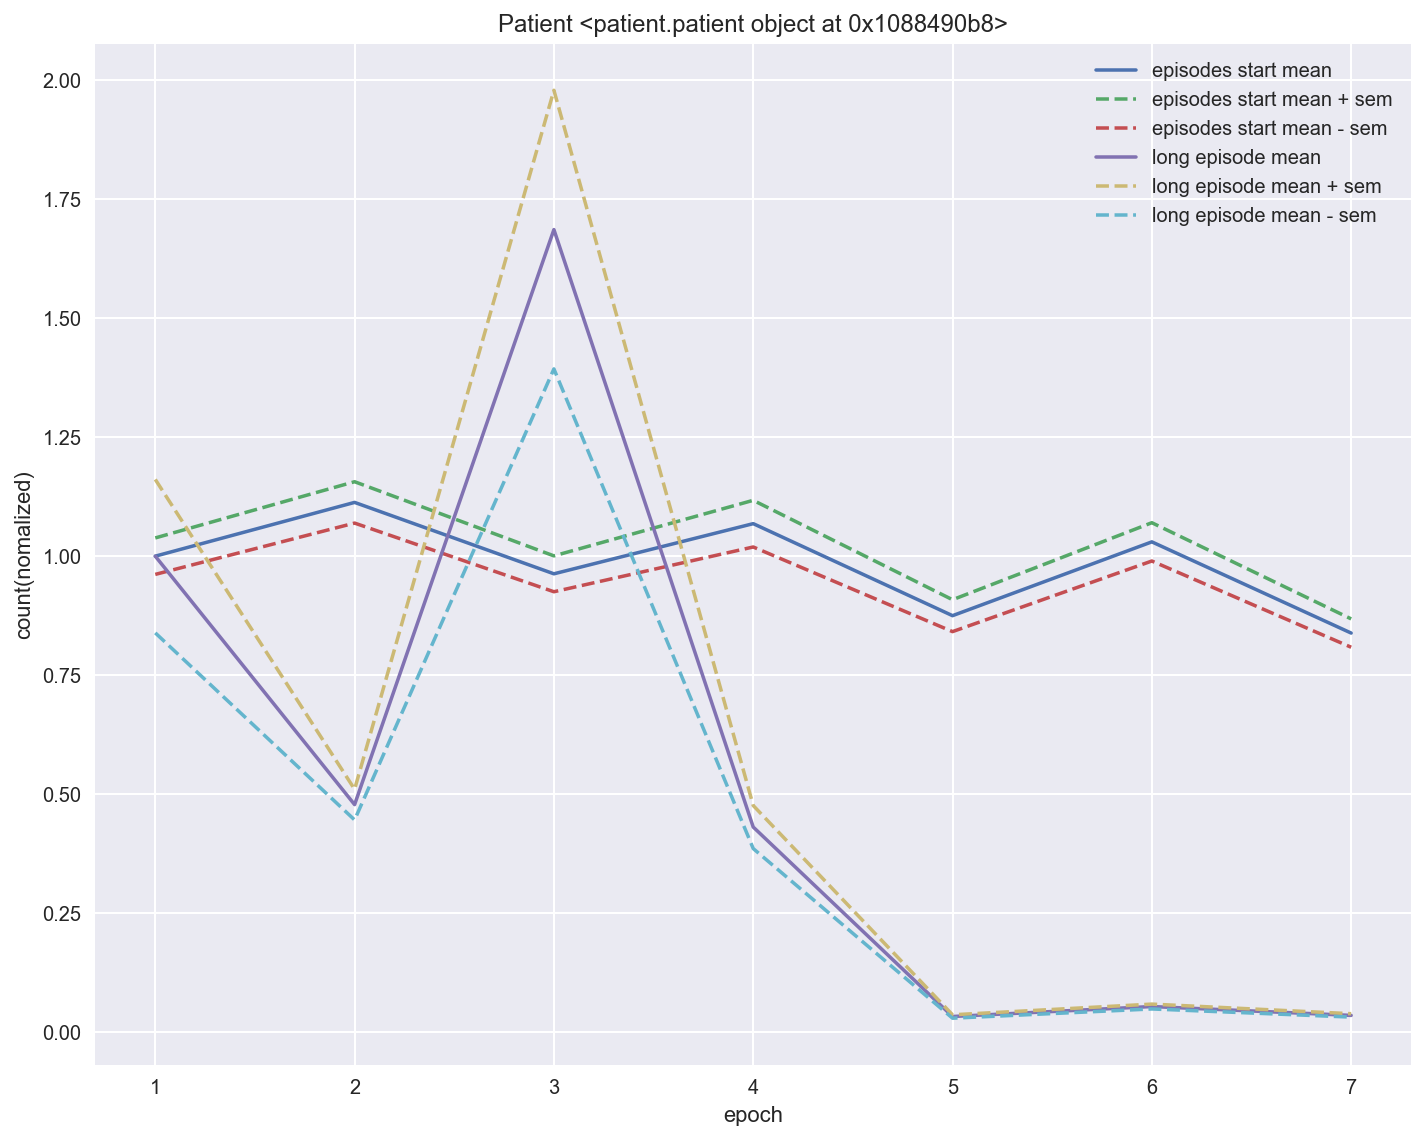

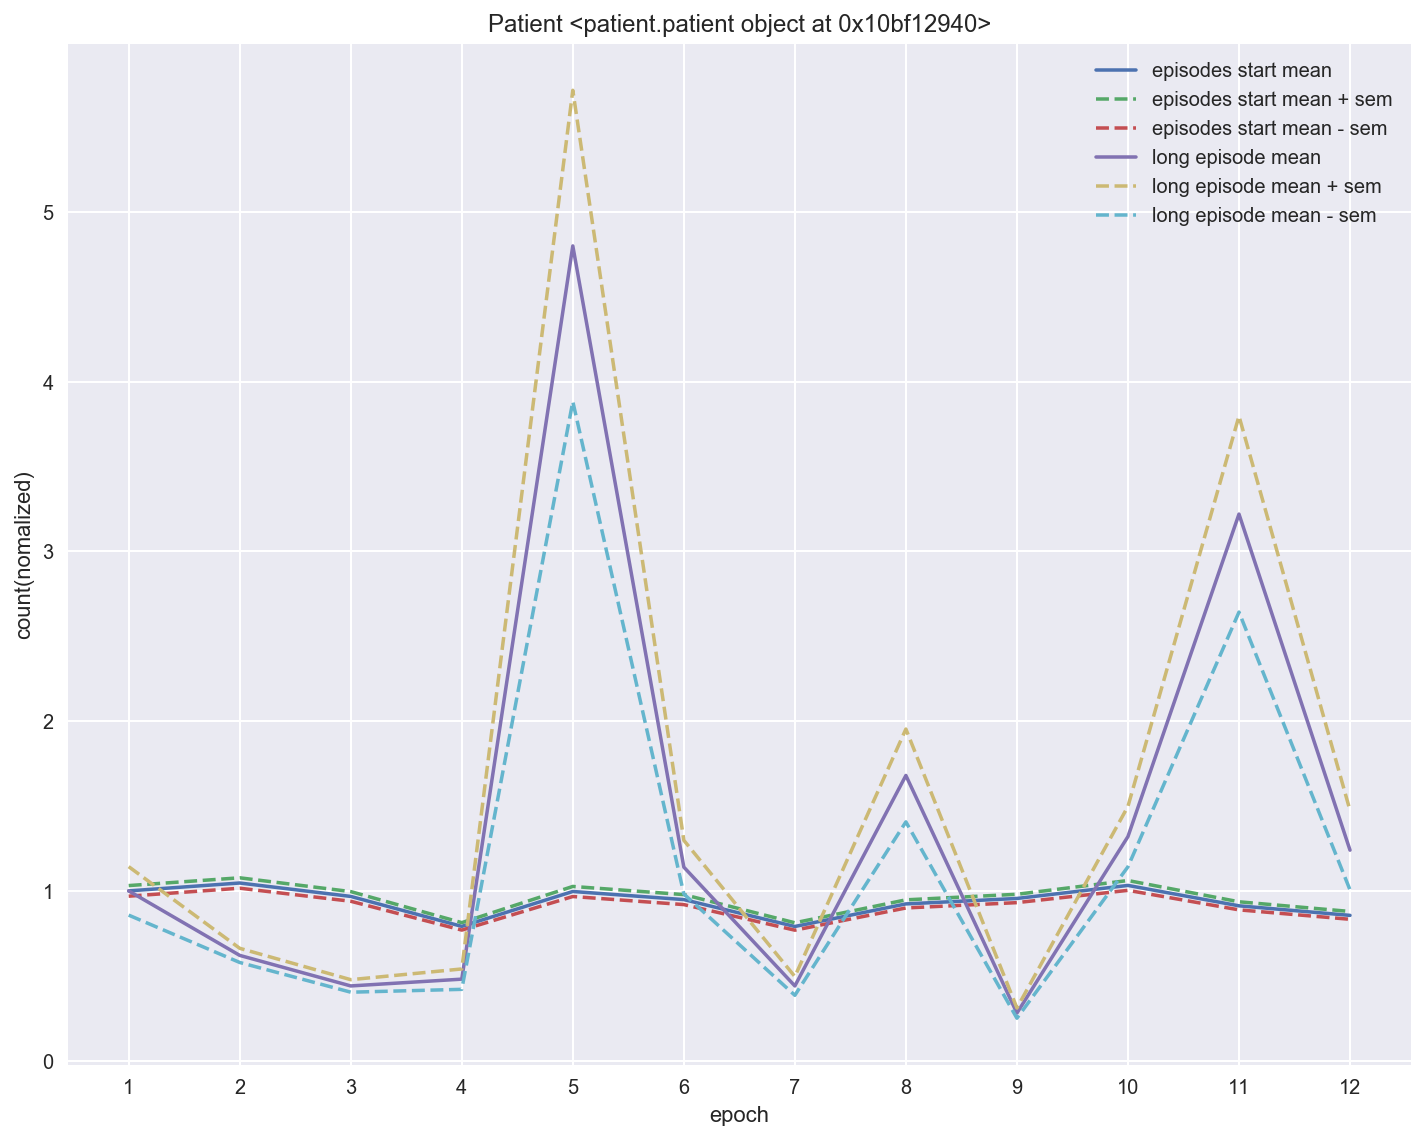

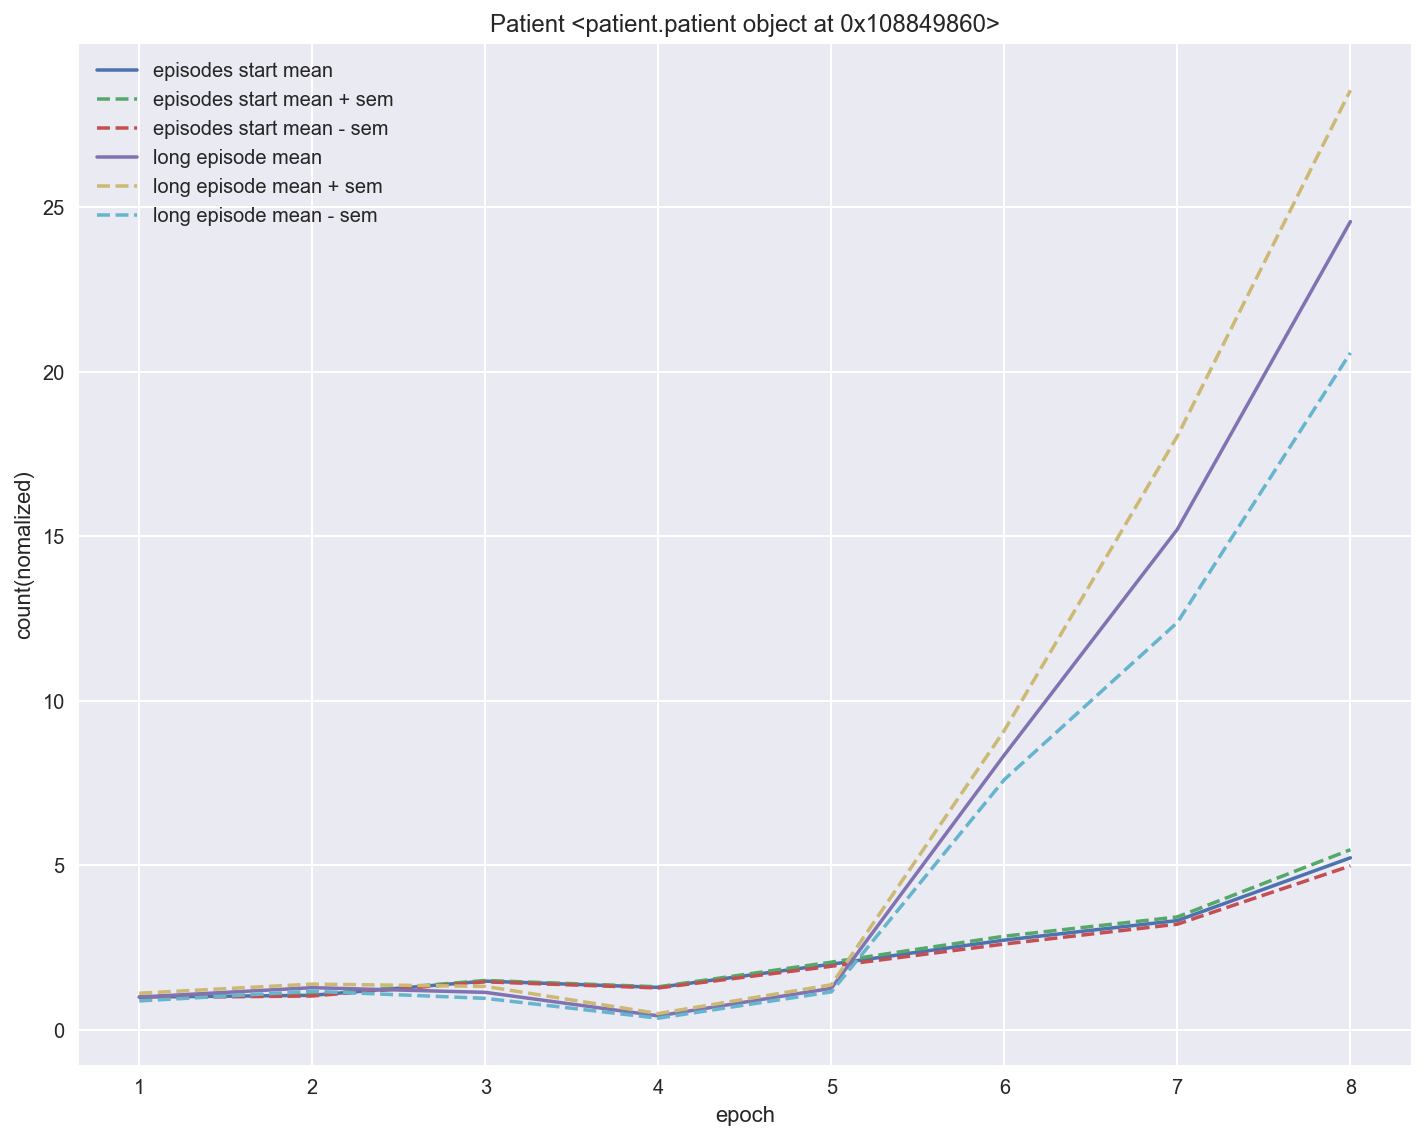

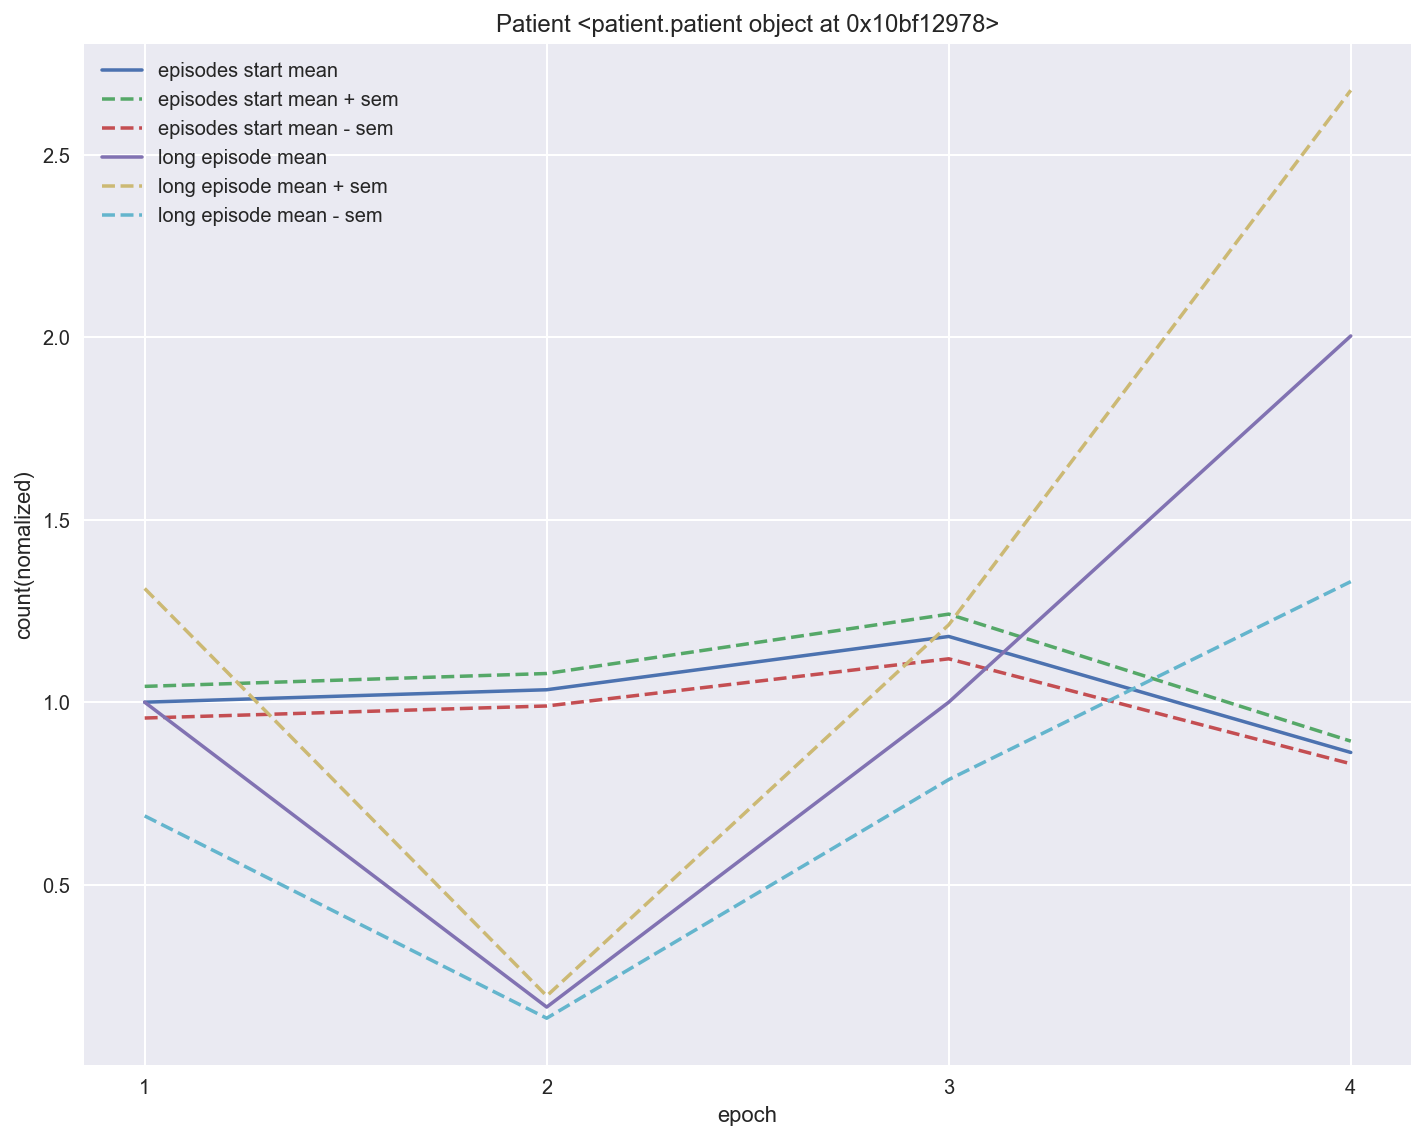

In [107]:
plot_epoch_mean(data_dict)

NameError: name 'pd' is not defined

In [11]:
data_222_1_es, epoch_label_222_1_es, data_222_1_le, epoch_label_222_1_le = prep(raw_data_222, start_222_1, end_222_1, num_per_epoch_222_1, 222)
data_222_2_es, epoch_label_222_2_es, data_222_2_le, epoch_label_222_2_le = prep(raw_data_222, start_222_2, end_222_2, num_per_epoch_222_2, 222)
data_222_3_es, epoch_label_222_3_es, data_222_3_le, epoch_label_222_3_le = prep(raw_data_222, start_222_3, end_222_3, num_per_epoch_222_3, 222)
data_231_es, epoch_label_231_es, data_231_le, epoch_label_231_le = prep(raw_data_231, start_231, end_231, num_per_epoch_231, 231)


NameError: name 'start_222_1' is not defined

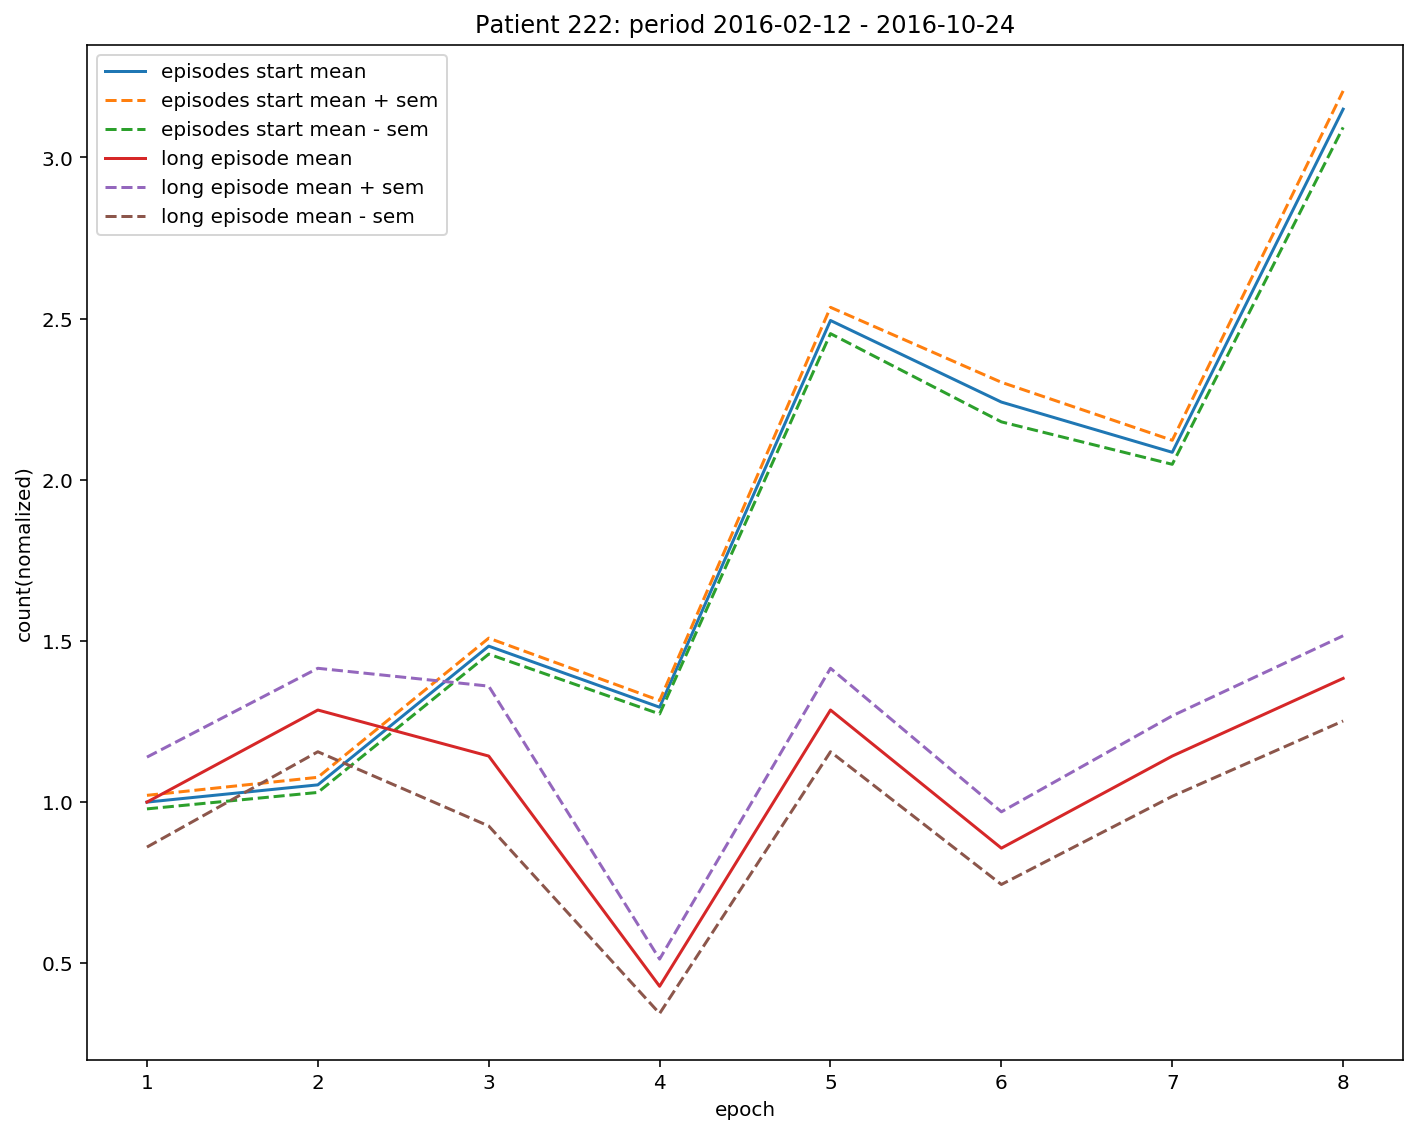

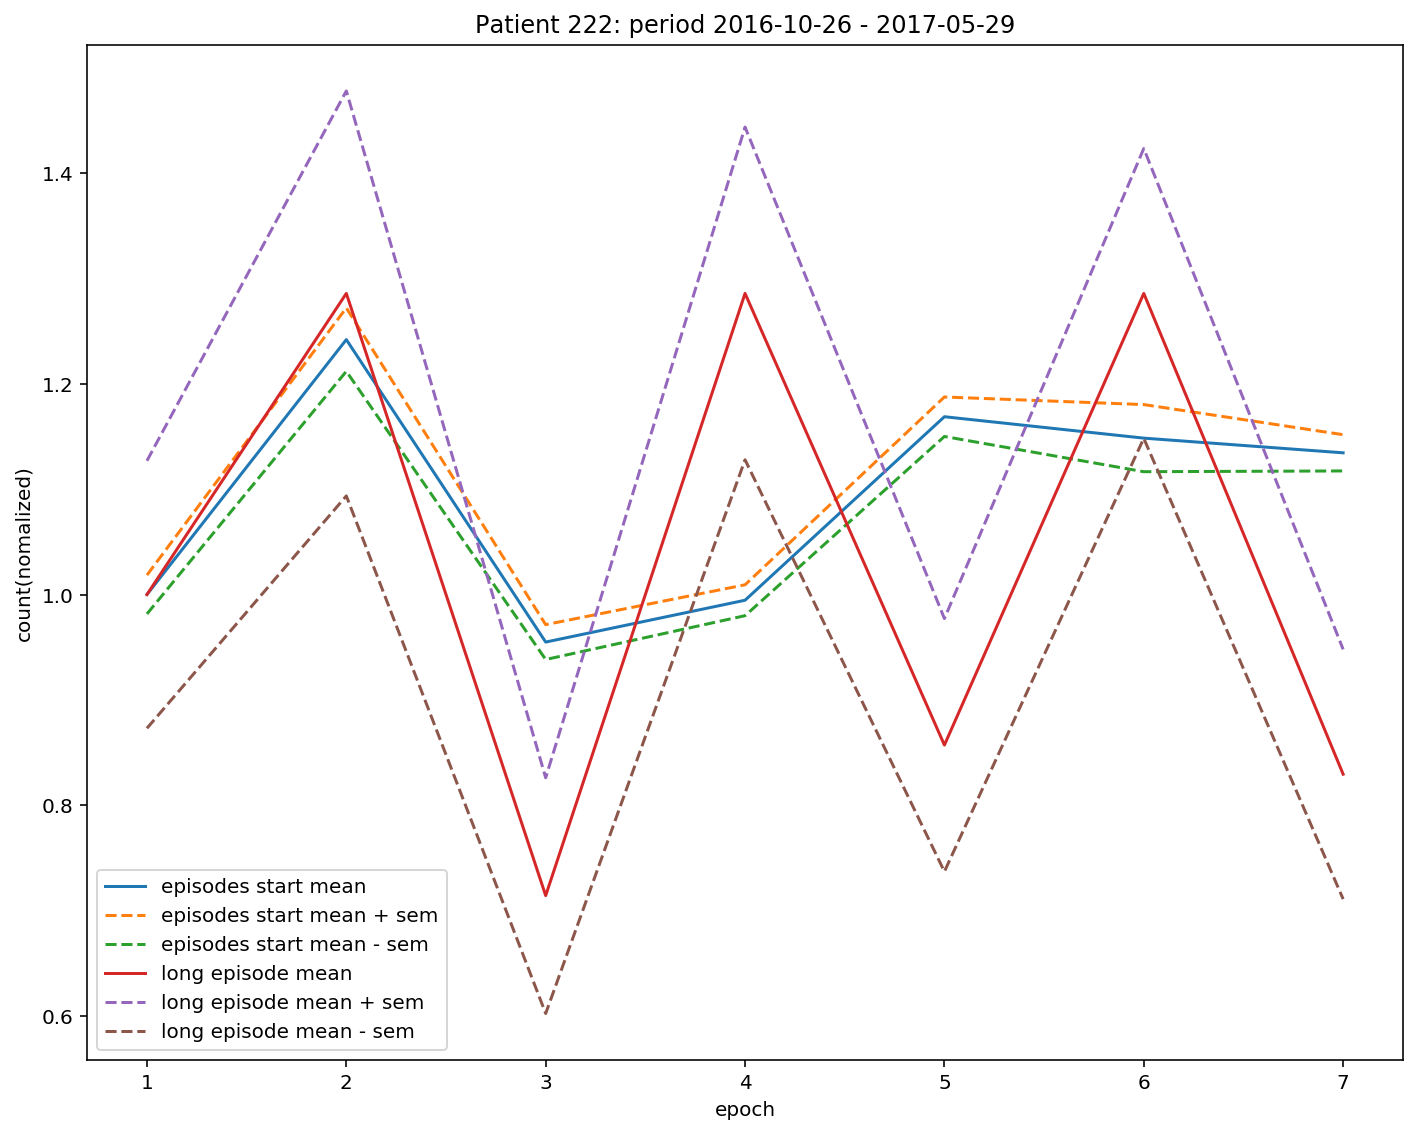

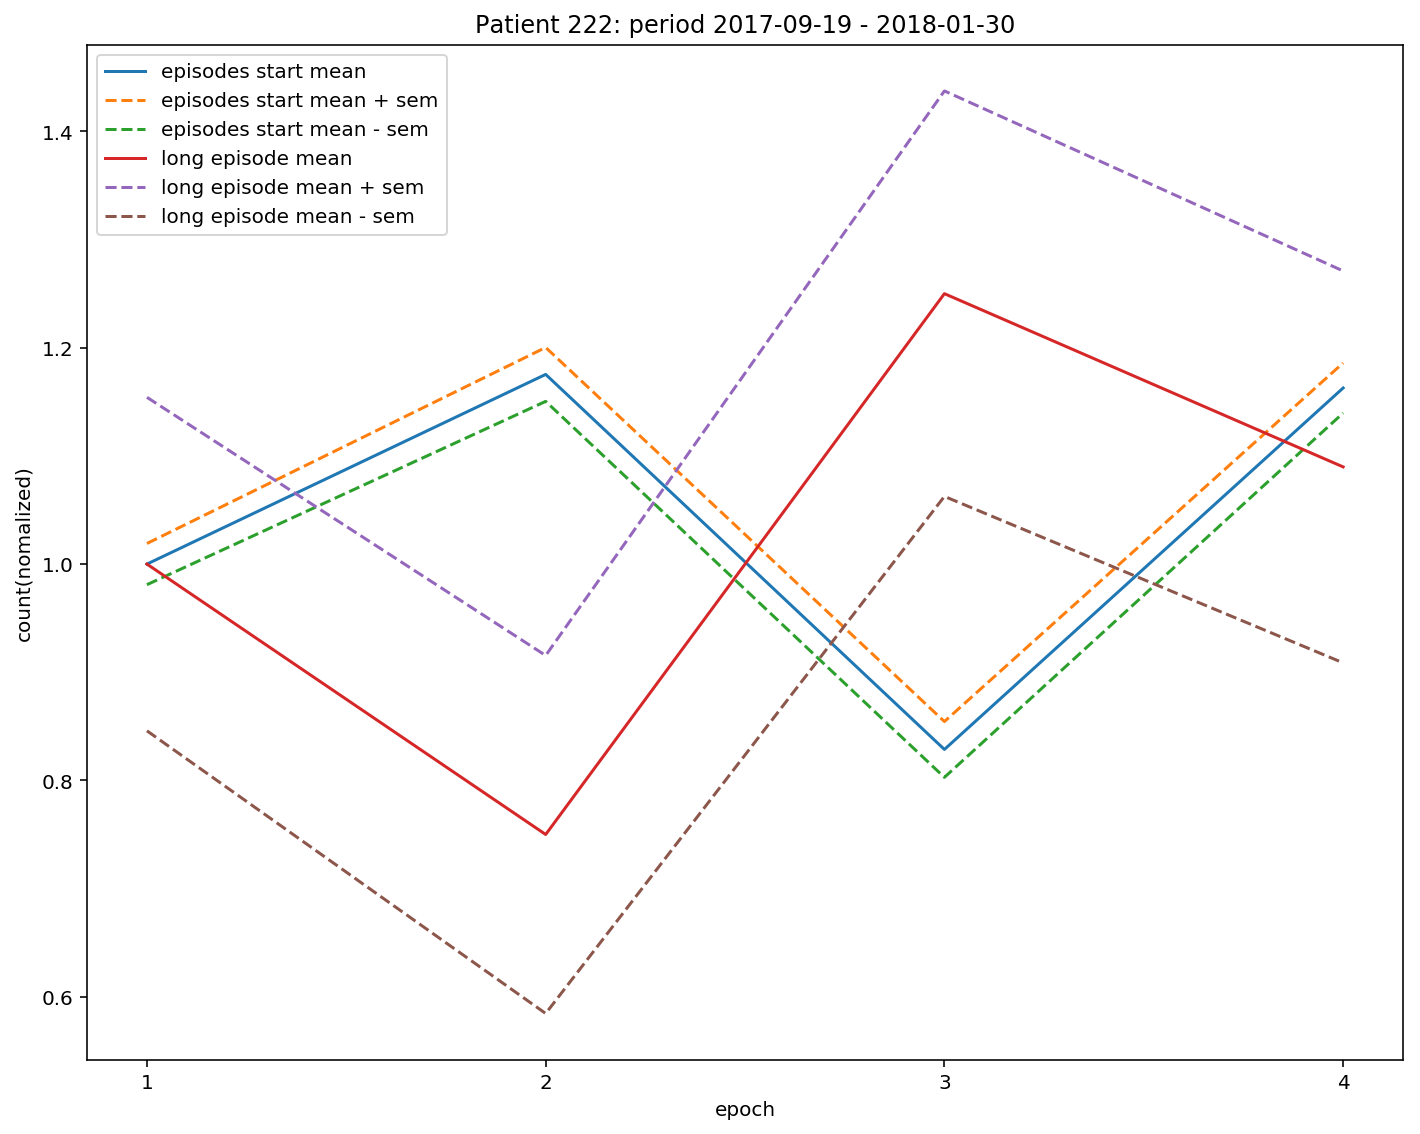

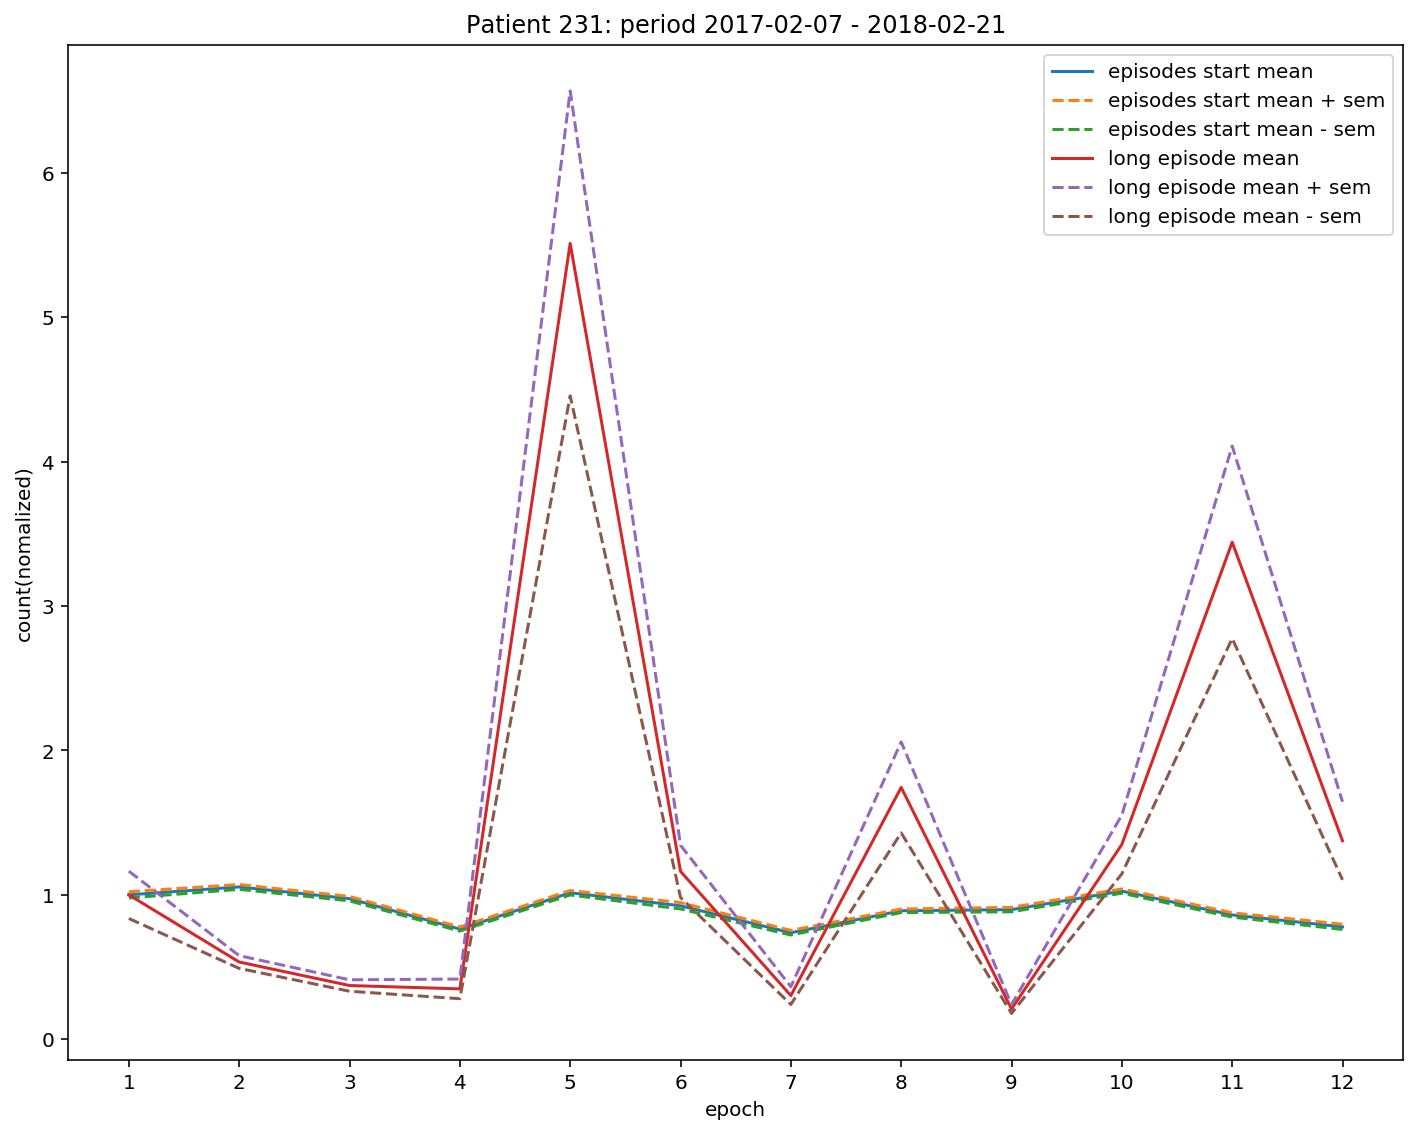

In [13]:
plot_epoch_mean(data_222_1_es)
plot_epoch_mean(data_222_2_es)
plot_epoch_mean(data_222_3_es)
plot_epoch_mean(data_231_es)

In [14]:
epoch_label_231_le

{0: True,
 1: True,
 2: True,
 3: True,
 4: False,
 5: False,
 6: True,
 7: False,
 8: True,
 9: False,
 10: False,
 11: False}

In [15]:
import h5py

def read_features(f, features_name):
    powbands = ['delta', 'theta', 'alpha', 'beta', 'low_gamma', 'high_gamma', 'all']
    col_names = ['filename', col_rs]
    for powband in powbands:
        for i in range(1,5):
            col_names.append(powband+str(i))
    col_names.append('i12')
    col_names.append('i34')
    features_222 = np.array(f[features_name[0]]).T
    features_231 = np.array(f[features_name[1]]).T
    features_df_222 = pd.DataFrame(features_222, columns = col_names)
    features_df_231 = pd.DataFrame(features_231, columns = col_names)
    features_df_222.loc[:,col_rs] = pd.to_datetime(features_df_222.loc[:,col_rs], unit = 'd', origin=pd.Timestamp('2000-01-01'))
    features_df_231.loc[:,col_rs] = pd.to_datetime(features_df_231.loc[:,col_rs], unit = 'd', origin=pd.Timestamp('2000-01-01'))
    return features_df_222, features_df_231

In [16]:
def feature_label(features, start, end, num_per_epoch, epoch_label_dict):
    features_epoch = addepoch(features, start, end, num_per_epoch)
    for key in epoch_label_dict:
        val = epoch_label_dict[key]
        features_epoch.loc[features_epoch.loc[:,'epoch'] == key,'label'] = val
    return features_epoch

In [17]:
def add_id(df, pat_id, if_stimulated):
    df.loc[:,'patid'] = pat_id
    df.loc[:,'if_stimulated'] = if_stimulated
    return df

In [18]:
f = h5py.File('../data/features.mat', 'r')
f_s = h5py.File('../data/features_sti.mat', 'r')

In [19]:
fea_222_s, fea_231_s = read_features(f_s, features_name = ['T_222_arr_scheduled_sti', 'T_231_arr_scheduled_sti'])


In [20]:

fea_222, fea_231 = read_features(f, features_name = ['T_222_arr_scheduled', 'T_231_arr_scheduled'])
fea_222_s, fea_231_s = read_features(f_s, features_name = ['T_222_arr_scheduled_sti', 'T_231_arr_scheduled_sti'])
feature_label_222_1 = add_id(feature_label(fea_222, start_222_1, end_222_1, num_per_epoch_222_1, epoch_label_222_1_le), '222_1', False)
feature_label_222_2 = add_id(feature_label(fea_222, start_222_2, end_222_2, num_per_epoch_222_2, epoch_label_222_2_le), '222_2', False)
feature_label_222_3 = add_id(feature_label(fea_222, start_222_3, end_222_3, num_per_epoch_222_3, epoch_label_222_3_le), '222_3', False)
feature_label_231= add_id(feature_label(fea_231, start_231, end_231, num_per_epoch_231, epoch_label_231_le) , '231', False)
feature_label_222_1_s = add_id(feature_label(fea_222_s, start_222_1, end_222_1, num_per_epoch_222_1, epoch_label_222_1_le), '222_1', True)
feature_label_222_2_s = add_id(feature_label(fea_222_s, start_222_2, end_222_2, num_per_epoch_222_2, epoch_label_222_2_le), '222_2', True)
feature_label_222_3_s = add_id(feature_label(fea_222_s, start_222_3, end_222_3, num_per_epoch_222_3, epoch_label_222_3_le), '222_3', True)
feature_label_231_s = add_id(feature_label(fea_231_s, start_231, end_231, num_per_epoch_231, epoch_label_231_le) , '231', True) 

/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/hp/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [21]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 5)
data = pd.concat([feature_label_222_1, feature_label_222_2, feature_label_222_3, feature_label_231, feature_label_222_1_s, feature_label_222_2_s, feature_label_222_3_s, feature_label_231_s], axis = 0)
data
data.to_pickle('../data/ml_ready_data.p')

,filename,region_start_time,...,patid,if_stimulated
86,1.309997e+17,2016-02-14 03:59:36.960000,...,222_1,False
87,1.310015e+17,2016-02-15 20:59:18.960000,...,222_1,False
88,1.310019e+17,2016-02-16 20:59:12.998400,...,222_1,False
89,1.310032e+17,2016-02-18 03:58:56.006400,...,222_1,False
90,1.310041e+17,2016-02-19 03:58:42.960000,...,222_1,False
...,...,...,...,...,...
884,1.316288e+17,2018-02-11 15:51:35.971200,...,231,True
885,1.316296e+17,2018-02-11 21:51:24.998400,...,231,True
886,1.316296e+17,2018-02-12 03:51:23.011200,...,231,True
887,1.316296e+17,2018-02-12 09:51:21.974400,...,231,True


In [22]:
def report_count():
    df_num = pd.DataFrame([], columns = ['patient_id', 'if_stimiuated', 'label', 'number'])
    pat_ids = ['222_1', '222_2', '222_3', '231']
    tf = [True, False]
    i = 0
    for pat_id in pat_ids:
        for sti in tf:
            for lab in tf: 
                df_num.loc[i,'patient_id'] = pat_id
                df_num.loc[i,'if_stimiuated'] = sti
                df_num.loc[i,'label'] = lab
                df_num.loc[i,'number'] = data.loc[np.array(data.loc[:,'patid']
                        == pat_id) & np.array(data.loc[:,'if_stimulated'] == sti) 
                        & np.array(data.loc[:,'label'] == lab)].shape[0]
                i += 1
    print(df_num)
    print(pd.DataFrame(df_num.groupby('patient_id').agg('sum').loc[:,'number']))
    print(pd.DataFrame(df_num.groupby(['patient_id', 'label']).agg('sum').loc[:,'number']))


In [23]:
report_count()

   patient_id if_stimiuated  label number
0       222_1          True   True    216
1       222_1          True  False    273
2       222_1         False   True     55
3       222_1         False  False     85
4       222_2          True   True    179
..        ...           ...    ...    ...
11      222_3         False  False     32
12        231          True   True    272
13        231          True  False    234
14        231         False   True    216
15        231         False  False    116

[16 rows x 4 columns]
            number
patient_id        
222_1          629
222_2          429
222_3          325
231            838
                  number
patient_id label        
222_1      False     358
           True      271
222_2      False     218
           True      211
222_3      False     178
           True      147
231        False     350
           True      488
